# ETF轮动策略

这个策略是ETF轮动策略的一个简单实现

标的有：上证50ETF（510050）、创业板50ETF（159949），无脑全仓多空，按收盘价计算，哪一只股票的close/MA20 - 1，若都小于0则清仓，买入大于0时两者中较高者

In [1]:
import akshare as ak
import numpy as np
import pandas as pd

all_index = ak.stock_zh_index_spot()
all_index

,代码,名称,最新价,涨跌额,涨跌幅,昨收,今开,最高,最低,成交量,成交额
0,sh000001,上证指数,3110.4753,3.160,0.102,3107.3156,3117.7549,3121.8352,3105.9397,236329981,288396222754
1,sh000002,Ａ股指数,3261.1321,3.323,0.102,3257.8091,3268.7631,3273.0418,3256.3416,236144737,288219871814
2,sh000003,Ｂ股指数,236.2248,-0.551,-0.233,236.7762,237.1447,237.4746,235.6653,160298,88898842
3,sh000004,工业指数,2811.2052,6.053,0.216,2805.1517,2815.9063,2819.0143,2806.2422,137677440,201888505086
4,sh000005,商业指数,2499.0740,-1.236,-0.049,2500.3097,2506.1282,2512.8386,2496.7111,20359724,20005872243
...,...,...,...,...,...,...,...,...,...,...,...
544,sz980015,,8390.9590,-55.535,-0.657,8446.4940,8465.9760,8472.8280,8380.5030,363245391,13885788005
545,sz980016,,7039.8100,-53.755,-0.758,7093.5650,7110.4450,7127.2430,7028.3450,539502106,18304985683
546,sz980028,,10141.3280,-12.177,-0.120,10153.5050,10174.5860,10214.1540,10124.8600,200201095,5007928661
547,sz980030,,4363.5800,70.796,1.649,4292.7840,4304.1650,4379.1150,4304.1650,1374281310,18519821103


In [2]:
SZ50_ETF = ak.fund_etf_hist_em(symbol='510050', adjust='qfq', start_date='20160722')
SZ50_ETF

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2016-07-22,1.886,1.868,1.890,1.867,1017701,2.246421e+08,1.22,-1.06,-0.020,0.41
1,2016-07-25,1.867,1.869,1.878,1.865,1008018,2.221032e+08,0.70,0.05,0.001,0.41
2,2016-07-26,1.869,1.895,1.897,1.865,1914550,4.245916e+08,1.71,1.39,0.026,0.78
3,2016-07-27,1.896,1.883,1.900,1.840,2926171,6.443228e+08,3.17,-0.63,-0.012,1.19
4,2016-07-28,1.871,1.879,1.886,1.861,1235216,2.727764e+08,1.33,-0.21,-0.004,0.50
...,...,...,...,...,...,...,...,...,...,...,...
1745,2023-09-22,2.570,2.634,2.635,2.566,12486141,3.260071e+09,2.68,2.41,0.062,5.07
1746,2023-09-25,2.627,2.609,2.628,2.605,6306563,1.647727e+09,0.87,-0.95,-0.025,2.56
1747,2023-09-26,2.607,2.592,2.613,2.590,5389943,1.400039e+09,0.88,-0.65,-0.017,2.19
1748,2023-09-27,2.591,2.604,2.616,2.591,7877179,2.048605e+09,0.96,0.46,0.012,3.20


In [3]:
CYB50_ETF = ak.fund_etf_hist_em(symbol='159949', adjust='qfq', start_date='20160722')
CYB50_ETF

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2016-07-22,0.992,0.987,0.997,0.980,1527866,1.511824e+08,0.00,0.00,0.000,0.71
1,2016-07-25,0.985,0.978,0.991,0.976,575244,5.657412e+07,1.52,-0.91,-0.009,0.27
2,2016-07-26,0.978,0.995,0.996,0.978,651064,6.450203e+07,1.84,1.74,0.017,0.30
3,2016-07-27,0.997,0.940,0.999,0.931,855069,8.225066e+07,6.83,-5.53,-0.055,0.40
4,2016-07-28,0.940,0.933,0.946,0.916,300326,2.806229e+07,3.19,-0.74,-0.007,0.14
...,...,...,...,...,...,...,...,...,...,...,...
1745,2023-09-22,0.820,0.845,0.845,0.820,7886720,6.576016e+08,3.04,2.80,0.023,3.67
1746,2023-09-25,0.841,0.838,0.844,0.836,4397462,3.691241e+08,0.95,-0.83,-0.007,2.05
1747,2023-09-26,0.837,0.831,0.840,0.831,3904392,3.257601e+08,1.07,-0.84,-0.007,1.82
1748,2023-09-27,0.830,0.839,0.849,0.830,6253693,5.252254e+08,2.29,0.96,0.008,2.91


In [4]:
SZ50_close = SZ50_ETF[['收盘', '日期', '开盘']]
SZ50_close.rename(columns={'收盘': '上证50ETF', '开盘': '上证50开盘'}, inplace=True)
CYB50_close = CYB50_ETF[['收盘', '日期', '开盘']]
CYB50_close.rename(columns={'收盘': '创业板50ETF', '开盘': '创业板50开盘'}, inplace=True)
stock_data = pd.merge(SZ50_close, CYB50_close)
stock_data

C:\Users\sersmile\AppData\Local\Temp\ipykernel_23096\1071290889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SZ50_close.rename(columns={'收盘': '上证50ETF', '开盘': '上证50开盘'}, inplace=True)
C:\Users\sersmile\AppData\Local\Temp\ipykernel_23096\1071290889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CYB50_close.rename(columns={'收盘': '创业板50ETF', '开盘': '创业板50开盘'}, inplace=True)


,上证50ETF,日期,上证50开盘,创业板50ETF,创业板50开盘
0,1.868,2016-07-22,1.886,0.987,0.992
1,1.869,2016-07-25,1.867,0.978,0.985
2,1.895,2016-07-26,1.869,0.995,0.978
3,1.883,2016-07-27,1.896,0.940,0.997
4,1.879,2016-07-28,1.871,0.933,0.940
...,...,...,...,...,...
1745,2.634,2023-09-22,2.570,0.845,0.820
1746,2.609,2023-09-25,2.627,0.838,0.841
1747,2.592,2023-09-26,2.607,0.831,0.837
1748,2.604,2023-09-27,2.591,0.839,0.830


In [5]:
# 计算MA20
MA20 = pd.concat([stock_data[['上证50ETF', '创业板50ETF']].rolling(20).mean(), stock_data[['日期', '上证50开盘', '创业板50开盘']]], axis=1)
MA20.dropna(inplace=True)
MA20.rename(columns={'上证50ETF': '上证50MA', '创业板50ETF': '创业板50MA'}, inplace=True)
MA20

,上证50MA,创业板50MA,日期,上证50开盘,创业板50开盘
19,1.89660,0.94025,2016-08-18,1.969,0.954
20,1.90165,0.93885,2016-08-19,1.957,0.963
21,1.90595,0.93695,2016-08-22,1.968,0.956
22,1.90910,0.93425,2016-08-23,1.956,0.940
23,1.91235,0.93480,2016-08-24,1.960,0.943
...,...,...,...,...,...
1745,2.60965,0.86565,2023-09-22,2.570,0.820
1746,2.61030,0.86380,2023-09-25,2.627,0.841
1747,2.60960,0.86035,2023-09-26,2.607,0.837
1748,2.60985,0.85730,2023-09-27,2.591,0.830


In [6]:
all_data = pd.merge(MA20, stock_data)
all_data

,上证50MA,创业板50MA,日期,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF
0,1.89660,0.94025,2016-08-18,1.969,0.954,1.958,0.959
1,1.90165,0.93885,2016-08-19,1.957,0.963,1.969,0.959
2,1.90595,0.93695,2016-08-22,1.968,0.956,1.955,0.940
3,1.90910,0.93425,2016-08-23,1.956,0.940,1.958,0.941
4,1.91235,0.93480,2016-08-24,1.960,0.943,1.948,0.951
...,...,...,...,...,...,...,...
1726,2.60965,0.86565,2023-09-22,2.570,0.820,2.634,0.845
1727,2.61030,0.86380,2023-09-25,2.627,0.841,2.609,0.838
1728,2.60960,0.86035,2023-09-26,2.607,0.837,2.592,0.831
1729,2.60985,0.85730,2023-09-27,2.591,0.830,2.604,0.839


In [7]:
all_data['上证50信号'] = all_data['上证50ETF'] / all_data['上证50MA']
all_data['创业板50信号'] = all_data['创业板50ETF'] / all_data['创业板50MA']
all_data

,上证50MA,创业板50MA,日期,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF,上证50信号,创业板50信号
0,1.89660,0.94025,2016-08-18,1.969,0.954,1.958,0.959,1.032374,1.019942
1,1.90165,0.93885,2016-08-19,1.957,0.963,1.969,0.959,1.035417,1.021462
2,1.90595,0.93695,2016-08-22,1.968,0.956,1.955,0.940,1.025735,1.003255
3,1.90910,0.93425,2016-08-23,1.956,0.940,1.958,0.941,1.025614,1.007225
4,1.91235,0.93480,2016-08-24,1.960,0.943,1.948,0.951,1.018642,1.017330
...,...,...,...,...,...,...,...,...,...
1726,2.60965,0.86565,2023-09-22,2.570,0.820,2.634,0.845,1.009331,0.976145
1727,2.61030,0.86380,2023-09-25,2.627,0.841,2.609,0.838,0.999502,0.970132
1728,2.60960,0.86035,2023-09-26,2.607,0.837,2.592,0.831,0.993256,0.965886
1729,2.60985,0.85730,2023-09-27,2.591,0.830,2.604,0.839,0.997758,0.978654


In [8]:
initial_date = all_data.iloc[1,:]['日期']
initial_date

'2016-08-19'

In [9]:
# 开始执行策略回测
backtest_dict = {'capital': [100000], 'SZ_position': [0], 'CYB_position': [0], 'date': [initial_date]}
backtest = pd.DataFrame(backtest_dict)


def sell(symbol=None, how='specific', data=None):
    """
    卖出ETF
    :param symbol: ETF对应的缩写，上证50为SZ，创业板50为CYB
    :param how: any为全卖出，不填写必填symbol
    :param data: 第二天的股价！
    """
    global backtest
    capital = backtest.loc[len(backtest) - 1, :]['capital']
    SZ_position = backtest.loc[len(backtest) - 1, :]['SZ_position']
    CYB_position = backtest.loc[len(backtest) -1, :]['CYB_position']
    if how == 'any':
        capital += SZ_position * data['上证50开盘']
        capital += CYB_position * data['创业板50开盘']
        SZ_position = 0
        CYB_position = 0
    else:
        if symbol == 'SZ':
            capital += SZ_position * data['上证50开盘']
            SZ_position = 0
        else:
            capital += CYB_position * data['创业板50开盘']
            CYB_position = 0
    backtest.loc[len(backtest), :] = [capital, SZ_position, CYB_position, data['日期']]


def buy(symbol=None, data=None):
    """
    买入某只ETF
    :param symbol: ETF对应的缩写，上证50为SZ，创业板50为CYB
    :param data: 第二天的股价
    """
    global backtest
    capital = backtest.loc[len(backtest) - 1, :]['capital']
    SZ_position = backtest.loc[len(backtest) - 1, :]['SZ_position']
    CYB_position = backtest.loc[len(backtest) -1, :]['CYB_position']
    if symbol == 'SZ':
        SZ_position += capital / data['上证50开盘']
        capital = 0
    else:
        CYB_position += capital / data['创业板50开盘']
        capital = 0
    backtest.loc[len(backtest), :] = [capital, SZ_position, CYB_position, data['日期']]


for i in range(all_data.shape[0] - 1):
    today_data = all_data.iloc[i, :]  # 每一天的数据，按照这个数据在第二天进行交易
    tomorrow_data = all_data.iloc[i+1, :]
    if today_data['上证50信号'] < 1 and today_data['创业板50信号'] < 1:
        sell(how='any', data=tomorrow_data)
    elif today_data['上证50信号'] > today_data['创业板50信号']:
        buy(symbol='SZ', data=today_data)
    elif today_data['上证50信号'] < today_data['创业板50信号']:
        buy(symbol='CYB', data=tomorrow_data)

backtest

,capital,SZ_position,CYB_position,date
0,100000.000000,0.000000,0.0,2016-08-19
1,0.000000,50787.201625,0.0,2016-08-18
2,0.000000,50787.201625,0.0,2016-08-19
3,0.000000,50787.201625,0.0,2016-08-22
4,0.000000,50787.201625,0.0,2016-08-23
...,...,...,...,...
1726,208677.062124,0.000000,0.0,2023-09-22
1727,0.000000,81197.300437,0.0,2023-09-22
1728,211681.362240,0.000000,0.0,2023-09-26
1729,211681.362240,0.000000,0.0,2023-09-27


In [10]:
result = pd.merge(backtest.rename(columns={'date': '日期'}), all_data)
result

,capital,SZ_position,CYB_position,日期,上证50MA,创业板50MA,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF,上证50信号,创业板50信号
0,100000.000000,0.000000,0.0,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462
1,0.000000,50787.201625,0.0,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462
2,0.000000,50787.201625,0.0,2016-08-18,1.89660,0.94025,1.969,0.954,1.958,0.959,1.032374,1.019942
3,0.000000,50787.201625,0.0,2016-08-22,1.90595,0.93695,1.968,0.956,1.955,0.940,1.025735,1.003255
4,0.000000,50787.201625,0.0,2016-08-23,1.90910,0.93425,1.956,0.940,1.958,0.941,1.025614,1.007225
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,208677.062124,0.000000,0.0,2023-09-22,2.60965,0.86565,2.570,0.820,2.634,0.845,1.009331,0.976145
1727,0.000000,81197.300437,0.0,2023-09-22,2.60965,0.86565,2.570,0.820,2.634,0.845,1.009331,0.976145
1728,211681.362240,0.000000,0.0,2023-09-26,2.60960,0.86035,2.607,0.837,2.592,0.831,0.993256,0.965886
1729,211681.362240,0.000000,0.0,2023-09-27,2.60985,0.85730,2.591,0.830,2.604,0.839,0.997758,0.978654


In [11]:
result['asset'] = result['上证50ETF'] * result['SZ_position'] + result['创业板50ETF'] * result['CYB_position'] + result['capital']
result

,capital,SZ_position,CYB_position,日期,上证50MA,创业板50MA,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF,上证50信号,创业板50信号,asset
0,100000.000000,0.000000,0.0,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462,100000.000000
1,0.000000,50787.201625,0.0,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462,100000.000000
2,0.000000,50787.201625,0.0,2016-08-18,1.89660,0.94025,1.969,0.954,1.958,0.959,1.032374,1.019942,99441.340782
3,0.000000,50787.201625,0.0,2016-08-22,1.90595,0.93695,1.968,0.956,1.955,0.940,1.025735,1.003255,99288.979177
4,0.000000,50787.201625,0.0,2016-08-23,1.90910,0.93425,1.956,0.940,1.958,0.941,1.025614,1.007225,99441.340782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,208677.062124,0.000000,0.0,2023-09-22,2.60965,0.86565,2.570,0.820,2.634,0.845,1.009331,0.976145,208677.062124
1727,0.000000,81197.300437,0.0,2023-09-22,2.60965,0.86565,2.570,0.820,2.634,0.845,1.009331,0.976145,213873.689352
1728,211681.362240,0.000000,0.0,2023-09-26,2.60960,0.86035,2.607,0.837,2.592,0.831,0.993256,0.965886,211681.362240
1729,211681.362240,0.000000,0.0,2023-09-27,2.60985,0.85730,2.591,0.830,2.604,0.839,0.997758,0.978654,211681.362240


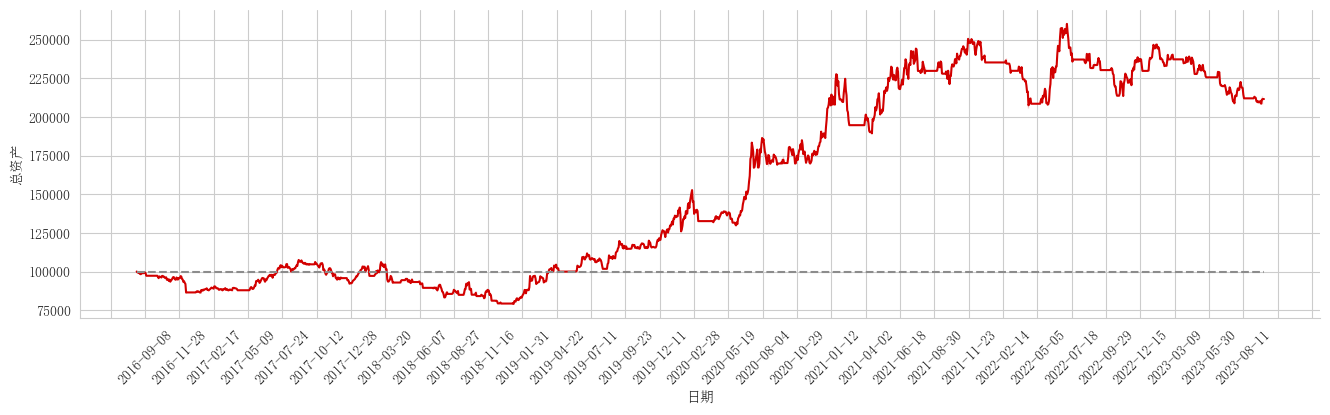

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False

ax = sns.lineplot(data=result, x='日期', y='asset', color='#d20000')
sns.set_style('white')
sns.despine()
ax.figure.set_size_inches(16, 4)
ax.set_xlabel('日期')
ax.set_ylabel('总资产')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.xticks(rotation=45)
ax.hlines(y=100000, xmin=result.loc[0, :]['日期'], xmax=result.loc[len(result) - 1, :]['日期'], colors='#8c8c8c', linestyles='--')
plt.show()

In [13]:
asset = result[['日期', 'asset']]
asset

,日期,asset
0,2016-08-19,100000.000000
1,2016-08-19,100000.000000
2,2016-08-18,99441.340782
3,2016-08-22,99288.979177
4,2016-08-23,99441.340782
...,...,...
1726,2023-09-22,208677.062124
1727,2023-09-22,213873.689352
1728,2023-09-26,211681.362240
1729,2023-09-27,211681.362240


In [14]:
asset = asset[['日期']].join(asset[['asset']].pct_change())
asset

,日期,asset
0,2016-08-19,NaN
1,2016-08-19,0.000000
2,2016-08-18,-0.005587
3,2016-08-22,-0.001532
4,2016-08-23,0.001535
...,...,...
1726,2023-09-22,0.000000
1727,2023-09-22,0.024903
1728,2023-09-26,-0.010251
1729,2023-09-27,0.000000


In [20]:
asset.dropna(inplace=True)
yearly_volatility = asset['asset'].std() * np.sqrt(len(asset) / 252)
yearly_yield = (result[['asset']].loc[len(result)-1, :]['asset'] / 100000) ** (252 / len(asset)) - 1
sharpe = (yearly_yield - 0.015) / yearly_volatility
sharpe

2.9371737713299657

In [16]:
from datetime import datetime

stock_index_df = ak.stock_zh_index_daily(symbol='sh000001')
stock_index_df = stock_index_df.where(stock_index_df['date'] > datetime.date(datetime(2016, 8, 19)))
stock_index_df.dropna(inplace=True)
stock_index_df.reset_index(inplace=True)
stock_index_df

,index,date,open,high,low,close,volume
0,6281,2016-08-22,3107.381,3112.740,3083.593,3084.805,1.853879e+10
1,6282,2016-08-23,3081.572,3101.110,3073.529,3089.706,1.613690e+10
2,6283,2016-08-24,3092.020,3097.148,3079.548,3085.880,1.457074e+10
3,6284,2016-08-25,3073.444,3073.444,3041.505,3068.329,1.740330e+10
4,6285,2016-08-26,3069.850,3087.652,3063.894,3070.309,1.496639e+10
...,...,...,...,...,...,...,...
1724,8005,2023-09-22,3084.757,3132.558,3078.801,3132.432,2.859784e+10
1725,8006,2023-09-25,3131.208,3131.208,3112.151,3115.607,2.580719e+10
1726,8007,2023-09-26,3114.021,3120.289,3102.273,3102.273,2.226443e+10
1727,8008,2023-09-27,3104.040,3125.447,3103.844,3107.316,2.404958e+10
